<a href="https://colab.research.google.com/github/AkshayAgr/rossmann-sales-prediction/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Retail Sales Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1**   - Akshay Agrawal

# **Project Summary -**

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. The dataset contains historical sales data of 1115 stores and supplemental information about the stores. 
As a first step, I performed data wrangling on the raw stores data. I made changes related to competition. I created new variables 'CompetitionExist' and 'CompetitionStartDate'. I also filled the null values in the columns related to competition. Then, I made changes related to Promo2. I created a new column ‘Promo2StartDate’ and filled null values in columns related to Promo2.
Then, I created a new table stores_data_merge by removing competition and promo month, year, and week columns. Then, I merged sales data with stores_data_merge and named it sales_data_merged. Then, I created new columns ‘DateDiff’, ‘Promo2Active’ and ‘CompetitionActive’. Finally, I created a new table sales_data_final by keeping only the essential columns for the analysis. After that, I divided the project in four parts i.e. exploratory data analysis, data preparation, model building and model explanation.

In exploratory data analysis, I created correlation plot of numerical variables – Sales, Customers, CompetitionDistance and DateDiff. Then, I plotted histograms of Sales, Customers and CompetitionDistance. After that, I created bar plot of the categorical variables with the median sales of each category.
In data preparation, I made final changes to the data and performed train test split. Using only the training data I created a new column called ‘MeanSales’ which represent the average sales potential of a store. Then data was standardized. 

In model building, I fitted Lasso, Ridge, and Simple linear regressions on standardized test data and evaluated the performance for each of the models. Then, I fitted Random Forest and Xgboost on unstandardized test data and evaluated their performance. I also tuned hyperparameters of Lasso, Ridge, Random Forest and Xgboost.

In model explanation, I used shap library to evaluate the impact of independent variables on sales in the Random Forest and Xgboost models.

In the end, I was able to reach some conclusions related to sales of Rossmann stores. Customers and sales are highly correlated. There is not much fluctuation in average sales per customer. CompetitionDistance has negative impact on sales. Competition stores are present in good locations. Moving away from the location of competitors reduces the sales. Promo2 has negative impact on sales. It seems that Promo2 is used for stock clearance in which huge discounts are given on specific items. This needs further investigation. Lasso and Ridge regressions have similar performance as the Simple linear regression. Random Forest and Xgboost have better performance than Lasso, Ridge, and Simple linear regression. Among the ensemble models Xgboost performed better with 85% explained variance. Both Random Forest and Xgboost can be improved further by tuning the hyperparameters. Random Forest require much more RAM as compared to other models. Number of estimators of random forest cannot be more than 100 because of RAM constraint of Google Colaboratory. MeanSales and Promo have the highest impact on sales. MeanSales is the average sales potential of a store. It depends on the location of store and demographics of customers it serves. Further investigation can be done to identify the sales potential of stores more accurately.


# **GitHub Link -**

https://github.com/AkshayAgr/rossmann-sales-prediction

# **Problem Statement**


**You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta, date
from sklearn.linear_model import LinearRegression
import datetime as dt
import calendar
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
import xgboost as xg
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
drive_path = '/content/drive/MyDrive/AlmaBetter/'
sales_raw_data = pd.read_csv(drive_path + 'Rossmann Stores Data.csv')
stores_raw_data = pd.read_csv(drive_path + 'store.csv')

Mounted at /content/drive


Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.


### Dataset First View

In [ ]:
# Sales data
sales_raw_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [ ]:
# Stores data
stores_raw_data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
sales_raw_data.shape, stores_raw_data.shape

((1017209, 9), (1115, 10))

### Dataset Information

In [ ]:
# Dataset Info
print(sales_raw_data.dtypes)
print(stores_raw_data.dtypes)

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object
Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
any(sales_raw_data.duplicated() ), any(stores_raw_data.duplicated() )

(False, False)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(sales_raw_data.isnull().sum()), print(stores_raw_data.isnull().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


(None, None)

There are 6 columns with Null values. 

### What did you know about your dataset?

Sales data comprises daily sales of 1115 Rossman stores

Stores data has supplemental information about the stores.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
sales_raw_data.columns, stores_raw_data.columns

(Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
        'StateHoliday', 'SchoolHoliday'],
       dtype='object'),
 Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
        'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
        'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
       dtype='object'))

In [ ]:
# Dataset Describe
print(sales_raw_data.describe())
print(stores_raw_data.describe())

              Store     DayOfWeek         Sales     Customers          Open  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01   
std    3.219087e+02  1.997391e+00  3.849926e+03  4.644117e+02  3.755392e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  3.727000e+03  4.050000e+02  1.000000e+00   
50%    5.580000e+02  4.000000e+00  5.744000e+03  6.090000e+02  1.000000e+00   
75%    8.380000e+02  6.000000e+00  7.856000e+03  8.370000e+02  1.000000e+00   
max    1.115000e+03  7.000000e+00  4.155100e+04  7.388000e+03  1.000000e+00   

              Promo  SchoolHoliday  
count  1.017209e+06   1.017209e+06  
mean   3.815145e-01   1.786467e-01  
std    4.857586e-01   3.830564e-01  
min    0.000000e+00   0.000000e+00  
25%    0.000000e+00   0.000000e+00  
50%    0.000000e+00   0.000000e+00  
75%    1.000000e+00   0.00000

### Variables Description 

Sales data has following columns:	
*	Id - an Id that represents a (Store, Date) duple within the test set
*	DayOfWeek - Day of the week (1-7)	
*	Date
*	Store - a unique Id for each store
*	Sales - the turnover for any given day (this is what you are predicting)
*	Customers - the number of customers on a given day
*	Open - an indicator for whether the store was open: 0 = closed, 1 = open
*	StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
*	SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

Stores data has following columns:
*	Store - a unique Id for each store 
*	StoreType - differentiates between 4 different store models: a, b, c, d
*	Assortment - describes an assortment level: a = basic, b = extra, c = extended
*	CompetitionDistance - distance in meters to the nearest competitor store
*	CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
*	Promo - indicates whether a store is running a promo on that day
*	Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
*	Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
*	PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb, May, Aug, Nov" means each round starts in February, May, August, November of any given year for that store 

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values sales data variables.
for col in sales_raw_data:
    print(sales_raw_data[col].unique())

[   1    2    3 ... 1113 1114 1115]
[5 4 3 2 1 7 6]
['2015-07-31' '2015-07-30' '2015-07-29' '2015-07-28' '2015-07-27'
 '2015-07-26' '2015-07-25' '2015-07-24' '2015-07-23' '2015-07-22'
 '2015-07-21' '2015-07-20' '2015-07-19' '2015-07-18' '2015-07-17'
 '2015-07-16' '2015-07-15' '2015-07-14' '2015-07-13' '2015-07-12'
 '2015-07-11' '2015-07-10' '2015-07-09' '2015-07-08' '2015-07-07'
 '2015-07-06' '2015-07-05' '2015-07-04' '2015-07-03' '2015-07-02'
 '2015-07-01' '2015-06-30' '2015-06-29' '2015-06-28' '2015-06-27'
 '2015-06-26' '2015-06-25' '2015-06-24' '2015-06-23' '2015-06-22'
 '2015-06-21' '2015-06-20' '2015-06-19' '2015-06-18' '2015-06-17'
 '2015-06-16' '2015-06-15' '2015-06-14' '2015-06-13' '2015-06-12'
 '2015-06-11' '2015-06-10' '2015-06-09' '2015-06-08' '2015-06-07'
 '2015-06-06' '2015-06-05' '2015-06-04' '2015-06-03' '2015-06-02'
 '2015-06-01' '2015-05-31' '2015-05-30' '2015-05-29' '2015-05-28'
 '2015-05-27' '2015-05-26' '2015-05-25' '2015-05-24' '2015-05-23'
 '2015-05-22' '2015-05-2

In [ ]:
# Check Unique Values stores data variables.
for col in stores_raw_data:
    print(stores_raw_data[col].unique())

[   1    2    3 ... 1113 1114 1115]
['c' 'a' 'd' 'b']
['a' 'c' 'b']
[1.270e+03 5.700e+02 1.413e+04 6.200e+02 2.991e+04 3.100e+02 2.400e+04
 7.520e+03 2.030e+03 3.160e+03 9.600e+02 1.070e+03 1.300e+03 4.110e+03
 3.270e+03 5.000e+01 1.384e+04 3.240e+03 2.340e+03 5.500e+02 1.040e+03
 4.060e+03 4.590e+03 4.300e+02 2.300e+03 6.000e+01 1.200e+03 2.170e+03
 4.000e+01 9.800e+03 2.910e+03 1.320e+03 2.240e+03 7.660e+03 5.400e+02
 4.230e+03 1.090e+03 2.600e+02 1.800e+02 1.180e+03 2.900e+02 4.880e+03
 9.710e+03 2.700e+02 1.060e+03 1.801e+04 6.260e+03 1.057e+04 4.500e+02
 3.036e+04 7.170e+03 7.200e+02 6.620e+03 4.200e+02 7.340e+03 2.840e+03
 5.540e+03 3.500e+02 2.050e+03 3.700e+03 2.256e+04 4.100e+02 2.500e+02
 1.130e+03 4.840e+03 1.750e+04 2.200e+03 1.650e+03 3.300e+02 2.244e+04
 1.996e+04 3.510e+03 3.320e+03 7.910e+03 2.370e+03 2.239e+04 2.710e+03
 1.181e+04 1.870e+03 4.800e+02 5.600e+02 1.069e+04 2.380e+03 2.410e+03
 2.400e+02 1.669e+04 1.462e+04 1.890e+03 8.780e+03 8.980e+03 1.514e+04
 1.793e+0

## 3. ***Data Wrangling***

### Data Wrangling Code

Make changes to sales data.

Convert date column of sales data to date data type and find minimum and maximum date.

In [ ]:
# Copy sales rawa data
sales_data = sales_raw_data.copy()
sales_data['Date']= pd.to_datetime(sales_data['Date'])
min_date = min(sales_data['Date'])
max_date = max(sales_data['Date'])
min_date, max_date

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

State holiday column in sales data has 2 kinds of zeroes. One is numeric and other is character.

In [ ]:
# Unique values of State holiday
sales_data['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

Make changes to Stores data.

In [ ]:
stores_data = stores_raw_data.copy()
stores_data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


Create a new variable 'CompetitionExist'. If CompetitionDistance is Null, CompetitionExist = 0 and CompetitionExist = 1 if not.

In [ ]:
stores_data['CompetitionExist'] = 1
stores_data.loc[stores_data['CompetitionDistance'].isnull() == True, 'CompetitionExist'] = 0

In [ ]:
stores_data[stores_data['CompetitionDistance'].isnull() == True]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionExist
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN,0
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,0
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov",0


If CompetitionDistance is Null, fill CompetitionOpenSinceMonth = 12 and CompetitionOpenSinceYear = 2015. This way the start of competition of these stores will be more than maximum date of the dataset.

In [ ]:
stores_data[stores_data['CompetitionDistance'].isnull() == True]['CompetitionOpenSinceMonth'].fillna(12, inplace = True)
stores_data[stores_data['CompetitionDistance'].isnull() == True]['CompetitionOpenSinceYear'].fillna(2015, inplace = True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Fill CompetitionDistance with Maximum distance where CompetitionDistance is Null.

In [ ]:
max_distance = max(stores_data['CompetitionDistance'])
stores_data['CompetitionDistance'].fillna(max_distance, inplace = True)

Fill remaining null values CompetitionOpenSinceMonth and CompetitionOpenSinceYear with month and year of Minimum date of dataset. 

In [ ]:
stores_data['CompetitionOpenSinceMonth'].fillna(1, inplace = True)
stores_data['CompetitionOpenSinceYear'].fillna(2013, inplace = True)

Create a new column 'CompetitionStartDate'.

In [ ]:
stores_data['CompetitionStartDate'] = pd.to_datetime(stores_data['CompetitionOpenSinceYear'] * 10000 + stores_data['CompetitionOpenSinceMonth'] * 100 + 1, format='%Y%m%d')

Fill Null values of Promo2SinceWeek and Promo2SinceYear with 53 and 2015. Fill Null values of PromoInterval to 'None'. 

In [ ]:
stores_data['Promo2SinceWeek'].fillna(53, inplace = True)
stores_data['Promo2SinceYear'].fillna(2015, inplace = True)
stores_data['PromoInterval'].fillna('None', inplace = True)

Convert Promo2SinceWeek and Promo2SinceYear to int datatype

In [ ]:
stores_data['Promo2SinceWeek'] = stores_data['Promo2SinceWeek'].astype(int)
stores_data['Promo2SinceYear'] = stores_data['Promo2SinceYear'].astype(int)

Add new column Promo2StartDate which signifies the first date of Promo2.

In [ ]:
stores_data['Promo2StartDate'] = pd.to_datetime(stores_data['Promo2SinceWeek'].astype(str) + stores_data['Promo2SinceYear'].astype(str).add('-1'), format='%V%G-%u')

All null values are removed from Stores data. 

In [ ]:
print(stores_data.isnull().sum())

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
CompetitionExist             0
CompetitionStartDate         0
Promo2StartDate              0
dtype: int64


In [ ]:
stores_data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionExist,CompetitionStartDate,Promo2StartDate
0,1,c,a,1270.0,9.0,2008.0,0,53,2015,None,1,2008-09-01,2015-12-28
1,2,a,a,570.0,11.0,2007.0,1,13,2010,"Jan,Apr,Jul,Oct",1,2007-11-01,2010-03-29
2,3,a,a,14130.0,12.0,2006.0,1,14,2011,"Jan,Apr,Jul,Oct",1,2006-12-01,2011-04-04
3,4,c,c,620.0,9.0,2009.0,0,53,2015,None,1,2009-09-01,2015-12-28
4,5,a,a,29910.0,4.0,2015.0,0,53,2015,None,1,2015-04-01,2015-12-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31,2013,"Jan,Apr,Jul,Oct",1,2014-06-01,2013-07-29
1111,1112,c,c,1880.0,4.0,2006.0,0,53,2015,None,1,2006-04-01,2015-12-28
1112,1113,a,c,9260.0,1.0,2013.0,0,53,2015,None,1,2013-01-01,2015-12-28
1113,1114,a,c,870.0,1.0,2013.0,0,53,2015,None,1,2013-01-01,2015-12-28


Create new table stores_data_merge by removing competition and promo month, year and week columns.

In [ ]:
stores_data_merge = stores_data.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear'], axis = 1)

In [ ]:
stores_data_merge

,Store,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,CompetitionExist,CompetitionStartDate,Promo2StartDate
0,1,c,a,1270.0,0,None,1,2008-09-01,2015-12-28
1,2,a,a,570.0,1,"Jan,Apr,Jul,Oct",1,2007-11-01,2010-03-29
2,3,a,a,14130.0,1,"Jan,Apr,Jul,Oct",1,2006-12-01,2011-04-04
3,4,c,c,620.0,0,None,1,2009-09-01,2015-12-28
4,5,a,a,29910.0,0,None,1,2015-04-01,2015-12-28
...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,1,"Jan,Apr,Jul,Oct",1,2014-06-01,2013-07-29
1111,1112,c,c,1880.0,0,None,1,2006-04-01,2015-12-28
1112,1113,a,c,9260.0,0,None,1,2013-01-01,2015-12-28
1113,1114,a,c,870.0,0,None,1,2013-01-01,2015-12-28


Merge stores_data_merge with sales_data.

In [ ]:
sales_data_merged = pd.merge(sales_data, stores_data_merge, on='Store')

Create new column 'CompetitionActive'. It's 1 if CompetitionStartDate <= Date and 0 if not.

In [ ]:
sales_data_merged['CompetitionActive'] = [(i <= j) for i,j in zip(sales_data_merged['CompetitionStartDate'], sales_data_merged['Date']) ]

Create column month_name to extract month from Date column.

In [ ]:
sales_data_merged['month_name'] = sales_data_merged['Date'].dt.month.apply(lambda x: calendar.month_abbr[x]) 

Create column Promo2MonthMatch to match month of Date and Values in PromoInterval columns.

In [ ]:
sales_data_merged['Promo2MonthMatch'] = [(i in j) for i,j in zip(sales_data_merged['month_name'], sales_data_merged['PromoInterval']) ]

Create column Promo2Started. If Promo2StartDate <= Date,  Promo2Started is 1 and 0 otherwise.

In [ ]:
sales_data_merged['Promo2Started'] = [(i <= j) for i,j in zip(sales_data_merged['Promo2StartDate'], sales_data_merged['Date']) ]

Create column Promo2Active. If Promo2MonthMatch = True and Promo2Started = True,  Promo2Started is 1 and 0 otherwise.

In [ ]:
sales_data_merged['Promo2Active'] = [(i & j) for i,j in zip(sales_data_merged['Promo2MonthMatch'], sales_data_merged['Promo2Started']) ]

Create column DateDiff. It is difference of Date from minimum date.

In [ ]:
sales_data_merged['DateDiff'] = (sales_data_merged['Date'] - min_date).dt.days

Convert datatypes of columns.

In [ ]:
sales_data_merged['DayOfWeek'] = sales_data_merged['DayOfWeek'].astype(str)
sales_data_merged['StateHoliday'] = sales_data_merged['StateHoliday'].astype(str)
sales_data_merged['SchoolHoliday'] = sales_data_merged['SchoolHoliday'].astype(str)
sales_data_merged['CompetitionActive'] = sales_data_merged['CompetitionActive'].astype(int)
sales_data_merged['Promo2Active'] = sales_data_merged['Promo2Active'].astype(int)

In [ ]:
sales_data_merged

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,PromoInterval,CompetitionExist,CompetitionStartDate,Promo2StartDate,CompetitionActive,month_name,Promo2MonthMatch,Promo2Started,Promo2Active,DateDiff
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,None,1,2008-09-01,2015-12-28,1,Jul,False,False,0,941
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,None,1,2008-09-01,2015-12-28,1,Jul,False,False,0,940
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,None,1,2008-09-01,2015-12-28,1,Jul,False,False,0,939
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,None,1,2008-09-01,2015-12-28,1,Jul,False,False,0,938
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,None,1,2008-09-01,2015-12-28,1,Jul,False,False,0,937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,...,"Mar,Jun,Sept,Dec",1,2013-01-01,2012-05-28,1,Jan,False,True,0,4
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,...,"Mar,Jun,Sept,Dec",1,2013-01-01,2012-05-28,1,Jan,False,True,0,3
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,...,"Mar,Jun,Sept,Dec",1,2013-01-01,2012-05-28,1,Jan,False,True,0,2
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,...,"Mar,Jun,Sept,Dec",1,2013-01-01,2012-05-28,1,Jan,False,True,0,1


In [ ]:
sales_data_merged.dtypes

Store                            int64
DayOfWeek                       object
Date                    datetime64[ns]
Sales                            int64
Customers                        int64
Open                             int64
Promo                            int64
StateHoliday                    object
SchoolHoliday                   object
StoreType                       object
Assortment                      object
CompetitionDistance            float64
Promo2                           int64
PromoInterval                   object
CompetitionExist                 int64
CompetitionStartDate    datetime64[ns]
Promo2StartDate         datetime64[ns]
CompetitionActive                int64
month_name                      object
Promo2MonthMatch                  bool
Promo2Started                     bool
Promo2Active                     int64
DateDiff                         int64
dtype: object

Extract required columns from sales_data_merged.

In [ ]:
sales_data_final = sales_data_merged[['Store', 'Sales', 'Customers', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
                                      'CompetitionDistance', 'CompetitionActive', 'Promo2Active', 'DateDiff']]

In [ ]:
sales_data_final.shape

(1017209, 14)

In [ ]:
sales_data_final.describe()

,Store,Sales,Customers,Open,Promo,CompetitionDistance,CompetitionActive,Promo2Active,DateDiff
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,5.613013e+03,9.167664e-01,1.494796e-01,4.650630e+02
std,3.219087e+02,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,8.498338e+03,2.762352e-01,3.565608e-01,2.744541e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,7.100000e+02,1.000000e+00,0.000000e+00,2.280000e+02
50%,5.580000e+02,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,2.330000e+03,1.000000e+00,0.000000e+00,4.560000e+02
75%,8.380000e+02,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,6.910000e+03,1.000000e+00,0.000000e+00,7.100000e+02
max,1.115000e+03,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,7.586000e+04,1.000000e+00,1.000000e+00,9.410000e+02


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Correlation of numerical variables.

In [ ]:
# Correlation
lin_num_vars = sales_data_final
lin_num_vars = lin_num_vars[['Sales', 'Customers', 'CompetitionDistance', 'DateDiff']]
lin_num_vars.corr()

,Sales,Customers,CompetitionDistance,DateDiff
Sales,1.000000,0.894711,-0.024339,0.041904
Customers,0.894711,1.000000,-0.101331,0.012679
CompetitionDistance,-0.024339,-0.101331,1.000000,0.001370
DateDiff,0.041904,0.012679,0.001370,1.000000


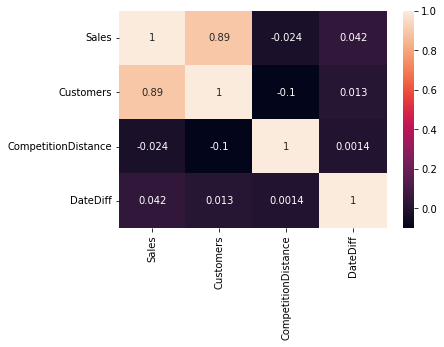

In [ ]:
# Heatmap
sns.heatmap(lin_num_vars.corr(), annot=True)

Sales and Customers are highly correlated. We can use both of these as dependent variables.

##### 1. Why did you pick the specific chart?

To find the correlation of numerical variables.

##### 2. What is/are the insight(s) found from the chart?

Sales and Customers are highly correlated. We can use both of these as dependent variables.

Sales are increasing with increase in date. 

Sales are decreasing with increase in competition distance.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Moving away from competition can decrease sales. 

#### Chart - 2

Regression plot of numerical variable. 

For dates mean sales of all the stores is calculated for each date. 

For competition distance mean sales on all the dates is calculated for each store. 

In [ ]:
# Data for regression plot
store_cd = pd.pivot_table(sales_data_final, index =['Store'], values = ['Sales', 'Customers', 'CompetitionDistance'], aggfunc='mean')
date_cd = pd.pivot_table(sales_data_final, index =['DateDiff'], values = ['Sales', 'Customers'], aggfunc='mean')
date_cd['Dates'] = date_cd.index

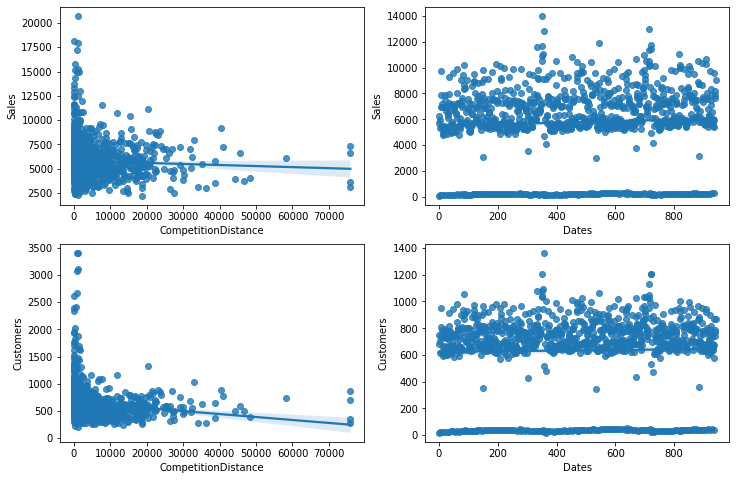

In [ ]:
# Regression plot of numerical variables
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(12,8))
sns.regplot(x = 'CompetitionDistance', y = 'Sales', data = store_cd, ax = ax1)
sns.regplot(x = 'Dates', y = 'Sales', data = date_cd, ax = ax2)
sns.regplot(x = 'CompetitionDistance', y = 'Customers', data = store_cd, ax = ax3)
sns.regplot(x = 'Dates', y = 'Customers', data = date_cd, ax = ax4)
plt.show()


##### 1. Why did you pick the specific chart?

To visualize the competition distance and dates. 

##### 2. What is/are the insight(s) found from the chart?

Decrease in sales and customers with increase in competition distance is clearly visible.

#### Chart - 3

Histograms of Sales, Customers and Competition distance.

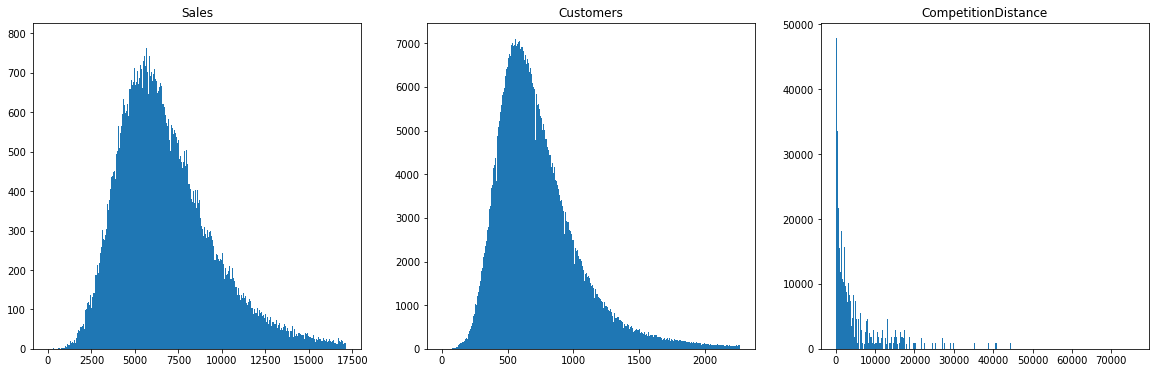

In [ ]:
# Histograms
fig, ((ax0, ax1, ax2)) = plt.subplots(figsize =(20, 6), nrows=1, ncols=3)
ax0.hist(lin_num_vars['Sales'], bins = range(1, int(np.percentile(lin_num_vars['Sales'], 99) ), 5) )
ax0.set_title('Sales')

ax1.hist(lin_num_vars['Customers'], bins = range(1, int(np.percentile(lin_num_vars['Customers'], 99) ), 5) )
ax1.set_title('Customers')

ax2.hist(lin_num_vars['CompetitionDistance'], bins = range(1, int(np.percentile(lin_num_vars['CompetitionDistance'], 100) ), 100) )
ax2.set_title('CompetitionDistance')

# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

To see the distribution of Sales, Customers and Competition distance.

##### 2. What is/are the insight(s) found from the chart?

Customers and sales have similar distributions.

Competition distance is small for majority of the stores. 

#### Chart - 4

Median sales for each category of categorical variables.

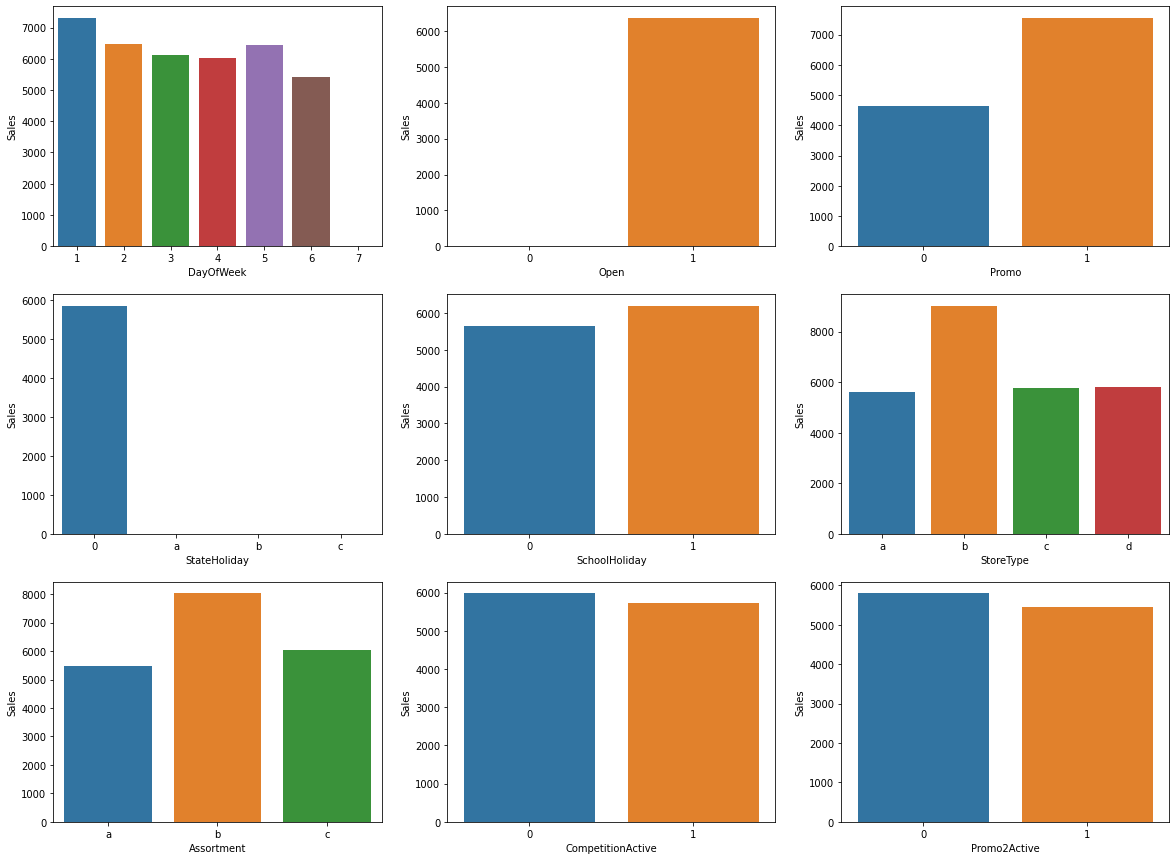

In [ ]:
# Plot of median sales for each category of categorical variables
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3,3, figsize=(20,15))

week_day = pd.pivot_table(sales_data_final, index =['DayOfWeek'], values = ['Sales'], aggfunc='median')
week_day['DayOfWeek'] = week_day.index
sns.barplot(ax=ax1, data=week_day, x='DayOfWeek', y='Sales')

open_day = pd.pivot_table(sales_data_final, index =['Open'], values = ['Sales'], aggfunc='median')
open_day['Open'] = open_day.index
sns.barplot(ax=ax2, data=open_day, x='Open', y='Sales')

Promo_data = pd.pivot_table(sales_data_final, index =['Promo'], values = ['Sales'], aggfunc='median')
Promo_data['Promo'] = Promo_data.index
sns.barplot(ax=ax3, data=Promo_data, x='Promo', y='Sales')

StateHoliday_data = pd.pivot_table(sales_data_final, index =['StateHoliday'], values = ['Sales'], aggfunc='median')
StateHoliday_data['StateHoliday'] = StateHoliday_data.index
sns.barplot(ax=ax4, data=StateHoliday_data, x='StateHoliday', y='Sales')

SchoolHoliday_data = pd.pivot_table(sales_data_final, index =['SchoolHoliday'], values = ['Sales'], aggfunc='median')
SchoolHoliday_data['SchoolHoliday'] = SchoolHoliday_data.index
sns.barplot(ax=ax5, data=SchoolHoliday_data, x='SchoolHoliday', y='Sales')

StoreType_data = pd.pivot_table(sales_data_final, index =['StoreType'], values = ['Sales'], aggfunc='median')
StoreType_data['StoreType'] = StoreType_data.index
sns.barplot(ax=ax6, data=StoreType_data, x='StoreType', y='Sales')

Assortment_data = pd.pivot_table(sales_data_final, index =['Assortment'], values = ['Sales'], aggfunc='median')
Assortment_data['Assortment'] = Assortment_data.index
sns.barplot(ax=ax7, data=Assortment_data, x='Assortment', y='Sales')

CompetitionActive_data = pd.pivot_table(sales_data_final, index =['CompetitionActive'], values = ['Sales'], aggfunc='median')
CompetitionActive_data['CompetitionActive'] = CompetitionActive_data.index
sns.barplot(ax=ax8, data=CompetitionActive_data, x='CompetitionActive', y='Sales')

Promo2Active_data = pd.pivot_table(sales_data_final, index =['Promo2Active'], values = ['Sales'], aggfunc='median')
Promo2Active_data['Promo2Active'] = Promo2Active_data.index
sns.barplot(ax=ax9, data=Promo2Active_data, x='Promo2Active', y='Sales')

plt.show()

##### 1. Why did you pick the specific chart?

To understand the impact of categorical variables on sales.

##### 2. What is/are the insight(s) found from the chart?

Day of week, Promo, State holiday, Store type and Assortment seem to have significant impact on Sales.

There are no sales when the stores are closed. 

School holiday, Competition active and Promo2 active seem to have very little impact on sales.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It helps us to identify the variables that have high impact on the sales and also the variables that have low impact on sales.

## ***5A. Hypothesis Testing***

### Hypothetical Statement - 1

Null hypothesis: CompetitionDistance has no impact on sales.

Alternative hypothesis: CompetitionDistance has impact on sales.

### Hypothetical Statement - 2

Null hypothesis: Promo does not impact sales.

Alternative hypothesis: Promo impacts sales.

### Hypothetical Statement - 3

Null hypothesis: DateDiff does not impact sales.

Alternative hypothesis: DateDiff impacts sales.

##### Which statistical test have you done to obtain P-Value?

Two tailed T-tests are performed to obtain the P-Value. 

CompetitionDistance has p-value of 0.845. Therefore, we cannot reject the Null hypothesis in this case.

Promo has p-value of 0.  Therefore, we reject the Null hypothesis in this case and accept the alternative hypothesis.

Datediff has p-value of 0.  Therefore, we cannot reject the Null hypothesis in this case and accept the alternative hypothesis.


##### Why did you choose the specific statistical test?

T-test shows whether a variable is statistically significant or not.

## ***6. Feature Engineering & Data Pre-processing***

### Remove 'Open' column from the final data 

There are no sales when stores are closed.

In [ ]:
# Sum of sales and customers when stores are closed
sales_data_final[sales_data_final['Open'] == 0]['Customers'].sum(), sales_data_final[sales_data_final['Open'] == 0]['Sales'].sum()

(0, 0)

Remove rows from sales data when stores are closed and then remove open column.

In [ ]:
sales_data_final = sales_data_final[sales_data_final['Open'] == 1 ]
sales_data_final = sales_data_final.drop(['Open'], axis=1)

Note that there are some days when stores are open but the sales are 0.

In [ ]:
sales_data_final[sales_data_final['Sales'] ==0].shape

(54, 13)

Final size of data

In [ ]:
sales_data_final.shape

(844392, 13)

### Dependent(y) and Independent variables(x)

In [ ]:
y = sales_data_final['Sales']
x = sales_data_final

### Categorical Encoding

In [ ]:
# Pandas dummies
x = pd.get_dummies(x)
x.columns

Index(['Store', 'Sales', 'Customers', 'Promo', 'CompetitionDistance',
       'CompetitionActive', 'Promo2Active', 'DateDiff', 'DayOfWeek_1',
       'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5',
       'DayOfWeek_6', 'DayOfWeek_7', 'StateHoliday_0', 'StateHoliday_a',
       'StateHoliday_b', 'StateHoliday_c', 'SchoolHoliday_0',
       'SchoolHoliday_1', 'StoreType_a', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_a', 'Assortment_b', 'Assortment_c'],
      dtype='object')

Pandas dummies are used for categorical encoding.

### Train test split

Next is selection of train and test data for the models. We need a model that can predict sales for next 6 weeks. The dataset has 942 days of sales. We will take last 42 days as test data and 730 days before that as training data. By using 730 days, I am using 2 years of data for training the model. 

In [ ]:
# Range of DateDiff
min(x.DateDiff), max(x.DateDiff)

(0, 941)

In [ ]:
# Selecting training and test data index
train_index = (x['DateDiff'] < 900) & (x['DateDiff'] >= 170)
test_index = x['DateDiff'] >= 900

In [ ]:
# Train and test data
x_train = x[train_index]
x_test = x[test_index]

y_train = pd.DataFrame(y[train_index])
y_test = pd.DataFrame(y[test_index])

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((648712, 28), (40282, 28), (648712, 1), (40282, 1))

### Feature Manipulation & Selection

#### Feature Manipulation

Creating a new column 'MeanSales'. MeanSales are average of daily sales for each store. This is calculated from training data only. This variable is a replacement of 'Store' variable. 'MeanSales' represent the potential sales of a store. There are 1115 stores. Dummyfying 'Store' variable will require 1114 variables. Model building will be very slow in that case. Also, free version of Google Colab may not be able to process so many columns.

In [ ]:
# MeanSales from train data
x_train_mean_sales = pd.pivot_table(x_train, index =['Store'], values = ['Sales'], aggfunc='mean')
x_train_mean_sales = x_train_mean_sales.rename({'Sales': 'MeanSales'}, axis=1)
x_train_mean_sales['Store'] = x_train_mean_sales.index
x_train_mean_sales.index = range(1115)

x_train = pd.merge(x_train_mean_sales, x_train, on='Store')
x_test = pd.merge(x_train_mean_sales, x_test, on='Store')

#### Feature Selection

Removing those columns from training and test data which are not required. After creating dummies, there is 1 extra variable. As N categories can be represented with (N-1) columns, I have removed extra column of each of the categorical variables. There are two numerical columns - CompetitionDistance and DateDiff.  



In [ ]:
# Removing columns that are not required
x_train = x_train.drop(['Store', 'Sales', 'Customers','DayOfWeek_7', 'StateHoliday_c', 'SchoolHoliday_0', 'StoreType_d', 'Assortment_c'], axis = 1)
x_test = x_test.drop(['Store', 'Sales', 'Customers','DayOfWeek_7', 'StateHoliday_c', 'SchoolHoliday_0', 'StoreType_d', 'Assortment_c'], axis = 1)

In [ ]:
x_test.columns, x_train.columns

(Index(['MeanSales', 'Promo', 'CompetitionDistance', 'CompetitionActive',
        'Promo2Active', 'DateDiff', 'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3',
        'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'StateHoliday_0',
        'StateHoliday_a', 'StateHoliday_b', 'SchoolHoliday_1', 'StoreType_a',
        'StoreType_b', 'StoreType_c', 'Assortment_a', 'Assortment_b'],
       dtype='object'),
 Index(['MeanSales', 'Promo', 'CompetitionDistance', 'CompetitionActive',
        'Promo2Active', 'DateDiff', 'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3',
        'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'StateHoliday_0',
        'StateHoliday_a', 'StateHoliday_b', 'SchoolHoliday_1', 'StoreType_a',
        'StoreType_b', 'StoreType_c', 'Assortment_a', 'Assortment_b'],
       dtype='object'))

### Data Scaling

Standardizing training data and test data for linear regression. By standardizing each variable will have same weightage in the model. If standardization is not performed variable with high values(MeanSales in this case) will have all the weightage in the model.

In [ ]:
# Scaler x
scaler = StandardScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

# Scaler y
scaler_y = StandardScaler()
y_train_scaled = pd.DataFrame(scaler_y.fit_transform(y_train), columns=y_train.columns)
y_test_scaled = pd.DataFrame(scaler_y.transform(y_test), columns=y_test.columns)


## ***5B. Hypothesis Testing***

OLS regression for testing hypothesis

In [ ]:
X2 = sm.add_constant(x_train_scaled)
est = sm.OLS(y_train_scaled, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                 9.902e+04
Date:                Sun, 25 Dec 2022   Prob (F-statistic):               0.00
Time:                        06:50:25   Log-Likelihood:            -4.5458e+05
No. Observations:              648712   AIC:                         9.092e+05
Df Residuals:                  648690   BIC:                         9.095e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.108e-16    

## ***7. ML Model Implementation***

### ML Model - 1

Linear Regression

In [ ]:
# Model fit
linear_regressor = LinearRegression()
linear_regressor.fit(x_train_scaled, y_train_scaled)

LinearRegression()

In [ ]:
# Coefficients of linear regression
lr_coef = pd.DataFrame({'Feature':linear_regressor.feature_names_in_, 'Coefficients':linear_regressor.coef_.flatten()})
lr_coef.append({'Feature':'Intercept', 'Coefficients':linear_regressor.intercept_}, ignore_index=True)

,Feature,Coefficients
0,MeanSales,0.770212
1,Promo,0.369079
2,CompetitionDistance,-0.000122
3,CompetitionActive,-0.016107
4,Promo2Active,-0.010398
5,DateDiff,0.042541
6,DayOfWeek_1,0.062951
7,DayOfWeek_2,-0.071642
8,DayOfWeek_3,-0.114539
9,DayOfWeek_4,-0.115336


In [ ]:
# Prediction on training data and test data 
y_pred_scaled = linear_regressor.predict(x_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

y_train_pred_scaled = linear_regressor.predict(x_train_scaled)
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)

Function to evaluate regression performance.

In [ ]:
def regression_performance(y_pred, y_train_pred):
  print("R-squared = ",r2_score(np.array(y_test), y_pred) )
  print("Adj R-squared = ", 1 - ( 1-r2_score(np.array(y_test), y_pred) ) * ( len(y_train) - 1 ) / ( len(y_train) - x_train.shape[1] - 1 ) )
  print("Explained variance score = ",explained_variance_score(np.array(y_test), y_pred) )
  print("RMSE test = ",np.sqrt(mean_squared_error(np.array(y_test), y_pred) ) )
  print("RMSE train = ",np.sqrt(mean_squared_error(np.array(y_train), y_train_pred) ) )
  sns.scatterplot(x = y_test.to_numpy().flatten(), y = y_pred.flatten() ) 
  plt.plot([0, 30000], [0, 30000], 'b-')
  plt.show()

R-squared =  0.80154234964181
Adj R-squared =  0.8015359249849515
Explained variance score =  0.8055710355249623
RMSE test =  1360.8145083402612
RMSE train =  1524.7640278009437


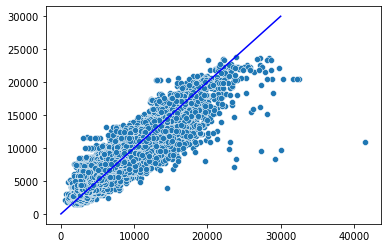

In [ ]:
# Performance
regression_performance(y_pred, y_train_pred)

Explained variance is around 80%. This means Linear Regression model can explain 80% varaince of the 'Sales'.  

### ML Model - 2

Lasso Regression

In [ ]:
lasso_model = Lasso()
lasso_alpha = dict()
lasso_alpha['alpha'] = np.arange(0, 0.005, 0.001)
lasso_grid = GridSearchCV( lasso_model, lasso_alpha ) 

In [ ]:
lasso_grid.fit( x_train_scaled, y_train_scaled )

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
Coordinate descent with no regularization may lead to unexpected results and is discouraged.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.353e+04, tolerance: 5.550e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
Coordinate descent with no regularization may lead to unexpected results and is discouraged.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.015e+04, tolerance: 4.991e+01 Linear regression mod

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': array([0.   , 0.001, 0.002, 0.003, 0.004])})

In [ ]:
lasso_grid.best_params_

{'alpha': 0.001}

In [ ]:
y_pred_scaled = lasso_grid.predict(x_test_scaled)
y_pred = scaler_y.inverse_transform(pd.DataFrame(y_pred_scaled) )

y_train_pred_scaled = lasso_grid.predict(x_train_scaled)
y_train_pred = scaler_y.inverse_transform(pd.DataFrame(y_train_pred_scaled))

R-squared =  0.8016554527919283
Adj R-squared =  0.8016490317965509
Explained variance score =  0.8053914777973643
RMSE test =  1360.426681661175
RMSE train =  1525.250015939472


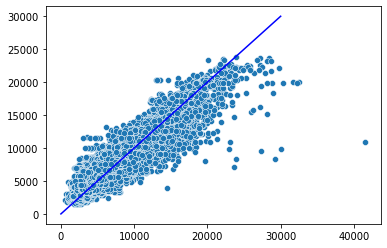

In [ ]:
regression_performance(y_pred, y_train_pred)

Following set of values were used for alpha parameter of Lasso regression. 
[1,2,3,4,5]

[0.1,0.2,0.3,0.4,0.5]

[0.01,0.02,0.03,0.04,0.05]

[0.001,0.002,0.003,0.004,0.005] 

Always the least value was the best parameter

There is not any significant improvement. Explained variance has declined.

Explained variance is around 80%. This means Lasso Regression model can explain 80% varaince of the 'Sales'. This is almost same as Linear Regression because the value of alpha is very close to 0. 

### ML Model - 3

Ridge Regression

In [ ]:
# Model
ridge_model = Ridge()
ridge_alpha = dict()
ridge_alpha['alpha'] = np.arange(2397.75, 2398.25, 0.25)
ridge_grid = GridSearchCV( ridge_model, ridge_alpha ) 

In [ ]:
# Model fit
ridge_grid.fit( x_train_scaled, y_train_scaled )

GridSearchCV(estimator=Ridge(), param_grid={'alpha': array([2397.75, 2398.  ])})

In [ ]:
# Best alpha
ridge_grid.best_params_

{'alpha': 2398.0}

In [ ]:
# Predictions
y_pred_scaled = ridge_grid.predict(x_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

y_train_pred_scaled = ridge_grid.predict(x_train_scaled)
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)

R-squared =  0.8015496293823376
Adj R-squared =  0.8015432049611457
Explained variance score =  0.8055489512000847
RMSE test =  1360.789549697054
RMSE train =  1524.8695420906506


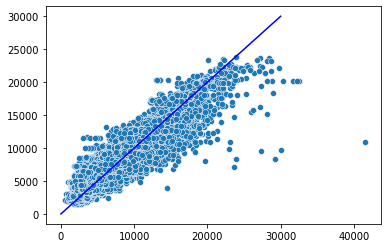

In [ ]:
# Performance
regression_performance(y_pred, y_train_pred)

Various sets of values were used for alpha parameter of Ridge regression. First the values were increased untill best model had highest parameter in the grid. When the best model was the lower value of the grid, values close to the lower value were tested.
Last grid had values [2397.75, 2398]. 2398 is the best value in the Ridge regression.

There is no significant improvement. Explained variance has declined very slightly as compared to Linear Regression.

Explained variance is around 80%. This means Ridge Regression model can explain 80% varaince of the 'Sales'. This is almost same as Linear Regression. There is slight improvement in RMSE of both test data and train data. 

### ML Model - 4

Random Forest Regression

In [ ]:
# Create regressor object
forest_regressor1 = RandomForestRegressor(n_estimators = 100, random_state = 0)

# Fit the regressor with x and y data
forest_regressor1.fit(x_train, y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(random_state=0)

R-squared =  0.8083755698447724
Adj R-squared =  0.8083693663993158
Explained variance score =  0.8111826967045853
RMSE test =  1337.1817678056589
RMSE train =  310.3929277080003


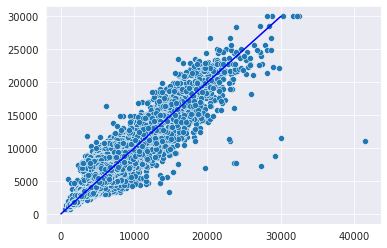

In [ ]:
# Predictions and performance
y_pred = forest_regressor1.predict(x_test)
y_train_pred = forest_regressor1.predict(x_train)
regression_performance(y_pred, y_train_pred)

Random forest with default values and 100 estimators shows slight improvement in Explained variance score and RMSE.

Number of estimators cannot be increased more than 100 because of RAM constraint of Google colab.

Optimizing depth 

In [ ]:
# Create regressor object
forest_regressor = RandomForestRegressor(random_state = 1)
forest_hyper = dict()
forest_hyper['max_depth'] = [4, 5, 6]
forest_hyper['n_estimators'] = [100]
forest_grid1 = GridSearchCV(estimator = forest_regressor, param_grid = forest_hyper) 

# Fit the regressor with x and y data
forest_grid1.fit(x_train, y_train.to_numpy().flatten())

GridSearchCV(estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_depth': [4, 5, 6], 'n_estimators': [100]})

In [ ]:
forest_grid1.best_params_, forest_grid1.best_score_

({'max_depth': 6, 'n_estimators': 100}, 0.7655949988756361)

In [ ]:
forest_hyper['max_depth'] = [6, 7, 8]
forest_hyper['n_estimators'] = [100]
forest_grid2 = GridSearchCV(estimator = forest_regressor, param_grid = forest_hyper) 

# Fit the regressor with x and y data
forest_grid2.fit(x_train, y_train.to_numpy().flatten())

GridSearchCV(estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_depth': [6, 7, 8], 'n_estimators': [100]})

In [ ]:
forest_grid2.best_params_, forest_grid2.best_score_

({'max_depth': 8, 'n_estimators': 100}, 0.7801294223571344)

Optimizing minimum samples split.

In [ ]:
forest_hyper = dict()
forest_hyper['n_estimators'] = [100]
forest_hyper['max_depth'] = [8]
forest_hyper['min_samples_split'] = [2, 3, 4]
forest_grid3 = GridSearchCV(estimator = forest_regressor, param_grid = forest_hyper) 

# fit the regressor with x and y data
forest_grid3.fit(x_train, y_train.to_numpy().flatten())

GridSearchCV(estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_depth': [8], 'min_samples_split': [2, 3, 4],
                         'n_estimators': [100]})

In [ ]:
forest_grid3.best_params_, forest_grid3.best_score_

({'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 100},
 0.7801294223571344)

Optimizing max samples

In [ ]:
forest_hyper['min_samples_split'] = [2]
forest_hyper['max_samples'] = [0.7, 0.8, 0.9]
forest_grid4 = GridSearchCV(estimator = forest_regressor, param_grid = forest_hyper) 

# fit the regressor with x and y data
forest_grid4.fit(x_train, y_train.to_numpy().flatten())

GridSearchCV(estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_depth': [8], 'max_samples': [0.7, 0.8, 0.9],
                         'min_samples_split': [2], 'n_estimators': [100]})

In [ ]:
forest_grid4.best_params_, forest_grid4.best_score_

({'max_depth': 8,
  'max_samples': 0.7,
  'min_samples_split': 2,
  'n_estimators': 100},
 0.7815226062384605)

In [ ]:
forest_hyper['min_samples_split'] = [2]
forest_hyper['max_samples'] = [0.5, 0.6, 0.7]
forest_grid5 = GridSearchCV(estimator = forest_regressor, param_grid = forest_hyper) 

# fit the regressor with x and y data
forest_grid5.fit(x_train, y_train.to_numpy().flatten())

GridSearchCV(estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_depth': [8], 'max_samples': [0.5, 0.6, 0.7],
                         'min_samples_split': [2], 'n_estimators': [100]})

In [ ]:
forest_grid5.best_params_, forest_grid5.best_score_

({'max_depth': 8,
  'max_samples': 0.5,
  'min_samples_split': 2,
  'n_estimators': 100},
 0.7826885037166345)

Optimizing max features

In [ ]:
forest_hyper['max_samples'] = [0.5]
forest_hyper['max_features'] = [0.6, 0.7, 0.8]
forest_grid6 = GridSearchCV(estimator = forest_regressor, param_grid = forest_hyper) 

# fit the regressor with x and y data
forest_grid6.fit(x_train, y_train.to_numpy().flatten())

GridSearchCV(estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_depth': [8], 'max_features': [0.6, 0.7, 0.8],
                         'max_samples': [0.5], 'min_samples_split': [2],
                         'n_estimators': [100]})

In [ ]:
forest_grid6.best_params_, forest_grid6.best_score_

({'max_depth': 8,
  'max_features': 0.7,
  'max_samples': 0.5,
  'min_samples_split': 2,
  'n_estimators': 100},
 0.7913101339338734)

Final Random Forest Model

In [ ]:
# Final model with optmized hyperparameters
forest_hyper['max_features'] = [0.7]
forest_final = RandomForestRegressor(max_depth = 8, max_features = 0.7, max_samples = 0.5, min_samples_split = 2,
                                     random_state = 1, n_estimators = 100)

# Fit the regressor with x and y data
forest_final.fit(x_train, y_train.to_numpy().flatten())

RandomForestRegressor(max_depth=8, max_features=0.7, max_samples=0.5,
                      random_state=1)

R-squared =  0.8364005851546135
Adj R-squared =  0.8363952889611902
Explained variance score =  0.8366329990935699
RMSE test =  1235.5373576508669
RMSE train =  1363.0860731563296


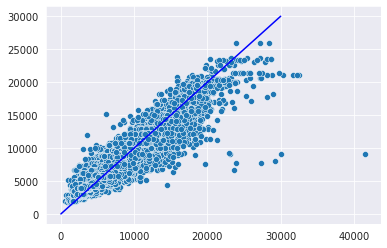

In [ ]:
# Predictions and performance
y_pred = forest_final.predict(x_test)
y_train_pred = forest_final.predict(x_train)
regression_performance(y_pred, y_train_pred)

After tuning the hyperparameters all the metrics have improved. RMSE train has increased after limiting the depth of the random forest. RMSE test has reduced significantly. Explained variance score has also increased to 83.7%. 

### ML Model - 5

XGboost Regression

In [ ]:
# Model
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', seed = 123)
xgb_hyper = dict()
xgb_hyper['n_estimators'] = [150]

# Model
xgb_grid1 = GridSearchCV( xgb_r, xgb_hyper ) 

In [ ]:
# Model Fit
xgb_grid1.fit(x_train, y_train)

GridSearchCV(estimator=XGBRegressor(objective='reg:squarederror', seed=123),
             param_grid={'n_estimators': [150]})

In [ ]:
# Model score
xgb_grid1.best_score_

0.839874721838228

R-squared =  0.8284560370298463
Adj R-squared =  0.8284504836480732
Explained variance score =  0.8284974503172721
RMSE test =  1265.1811935737944
RMSE train =  1224.0187923556819


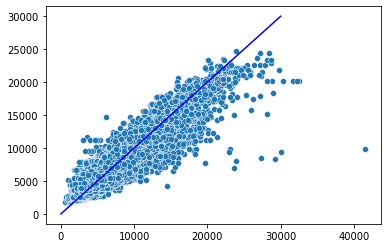

In [ ]:
# Prediction and perfromance
y_pred = xgb_grid1.predict(x_test)
y_train_pred = xgb_grid1.predict(x_train)
regression_performance(y_pred, y_train_pred)

With 150 estimators and default hyperparameters, XGboost shows higher performance as compared to linear, ridge and lasso regressions. 

Hyperparameter tuning 

In [ ]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', seed = 123)
xgb_hyper = dict()
xgb_hyper['learning_rate'] = [0.1]
xgb_hyper['n_estimators'] = [150]
xgb_hyper['max_depth'] = [5]
xgb_hyper['min_child_weight'] = [1]
xgb_hyper['gamma'] = [0]
xgb_hyper['subsample'] = [0.8]
xgb_hyper['colsample_bytree'] = [0.8]

xgb_grid2 = GridSearchCV( xgb_r, xgb_hyper ) 

In [ ]:
xgb_grid2.fit(x_train, y_train)

GridSearchCV(estimator=XGBRegressor(objective='reg:squarederror', seed=123),
             param_grid={'colsample_bytree': [0.8], 'gamma': [0],
                         'learning_rate': [0.1], 'max_depth': [5],
                         'min_child_weight': [1], 'n_estimators': [150],
                         'subsample': [0.8]})

In [ ]:
xgb_grid2.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 150,
 'subsample': 0.8}

In [ ]:
xgb_grid2.best_score_

0.8692294341292396

Tuning maximum depth and minimum child weight.

In [ ]:
xgb_hyper['max_depth'] = [4,5,6]
xgb_hyper['min_child_weight'] = [4,5,6]
xgb_grid3 = GridSearchCV( xgb_r, xgb_hyper ) 
xgb_grid3.fit(x_train, y_train)

GridSearchCV(estimator=XGBRegressor(objective='reg:squarederror', seed=123),
             param_grid={'colsample_bytree': [0.8], 'gamma': [0],
                         'learning_rate': [0.1], 'max_depth': [4, 5, 6],
                         'min_child_weight': [4, 5, 6], 'n_estimators': [150],
                         'subsample': [0.8]})

In [ ]:
xgb_grid3.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 5,
 'n_estimators': 150,
 'subsample': 0.8}

In [ ]:
xgb_grid3.best_score_

0.875688835641987

Optimizing gamma

In [ ]:
xgb_hyper['max_depth'] = [6]
xgb_hyper['min_child_weight'] = [5]
xgb_hyper['gamma'] = [0, 0.1, 0.2]
xgb_grid4 = GridSearchCV( xgb_r, xgb_hyper ) 
xgb_grid4.fit(x_train, y_train)

GridSearchCV(estimator=XGBRegressor(objective='reg:squarederror', seed=123),
             param_grid={'colsample_bytree': [0.8], 'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.1], 'max_depth': [6],
                         'min_child_weight': [5], 'n_estimators': [150],
                         'subsample': [0.8]})

In [ ]:
xgb_grid4.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 5,
 'n_estimators': 150,
 'subsample': 0.8}

In [ ]:
xgb_grid4.best_score_

0.875688835641987

Optimizing subsample and colsample by tree - 1st iteration.

In [ ]:
xgb_hyper['gamma'] = [0]
xgb_hyper['subsample'] = [0.7, 0.8, 0.9]
xgb_hyper['colsample_bytree'] = [0.7, 0.8, 0.9]
xgb_grid5 = GridSearchCV( xgb_r, xgb_hyper ) 
xgb_grid5.fit(x_train, y_train)

GridSearchCV(estimator=XGBRegressor(objective='reg:squarederror', seed=123),
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9], 'gamma': [0],
                         'learning_rate': [0.1], 'max_depth': [6],
                         'min_child_weight': [5], 'n_estimators': [150],
                         'subsample': [0.7, 0.8, 0.9]})

In [ ]:
xgb_grid5.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 5,
 'n_estimators': 150,
 'subsample': 0.9}

In [ ]:
xgb_grid5.best_score_

0.8757441063504391

Optimizing subsample and colsample by tree - 2nd iteration.

In [ ]:
xgb_hyper['subsample'] = [0.85, 0.9, 0.95]
xgb_hyper['colsample_bytree'] = [0.75, 0.8, 0.85]
xgb_grid6 = GridSearchCV( xgb_r, xgb_hyper ) 
xgb_grid6.fit(x_train, y_train)

In [ ]:
xgb_grid6.best_params_

{'colsample_bytree': 0.85,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 5,
 'n_estimators': 150,
 'subsample': 0.95}

In [ ]:
xgb_grid6.best_score_

0.8758232703091814

Final XGboost model.

In [ ]:
xgb_final = xg.XGBRegressor(objective ='reg:squarederror', seed = 123, colsample_bytree = 0.85, gamma = 0,
                        learning_rate = 0.1, max_depth = 6, min_child_weight = 5, n_estimators = 150, subsample = 0.95 )

xgb_final.fit(x_train, y_train)

XGBRegressor(colsample_bytree=0.85, max_depth=6, min_child_weight=5,
             n_estimators=150, objective='reg:squarederror', seed=123,
             subsample=0.95)

R-squared =  0.8510287336381741
Adj R-squared =  0.8510239110008688
Explained variance score =  0.8512354824726578
RMSE test =  1179.0066727592643
RMSE train =  1003.3648791635935


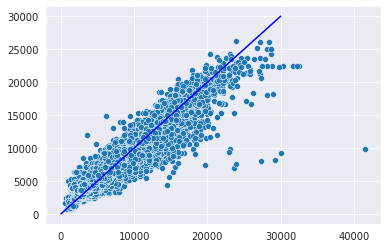

In [ ]:
y_pred = xgb_final.predict(x_test)
y_train_pred = xgb_final.predict(x_train)
regression_performance(y_pred, y_train_pred)

After hyperparameter tuning, all the metrics have significantly improved. RMSE on test data has reduced. Explained variance score is 85.1% which is least of all the models.

### Model explaination 

XGBoost is the best model based on all the metrics used to evaluate the model. 

Model is explained using the Shap library. 

In [ ]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()

# Explainer values
explainer = shap.Explainer(xgb_final)
shap_values = explainer(x_train)

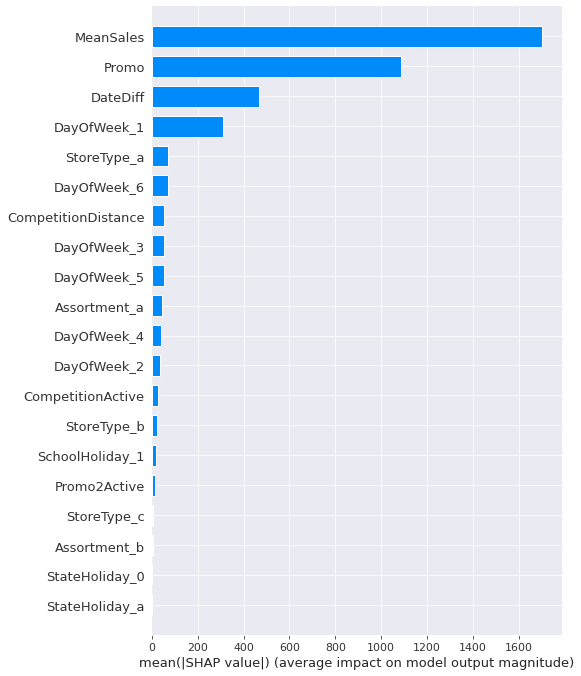

In [ ]:
shap.summary_plot(shap_values, x_train, plot_type="bar")

Explaination of Random Forest model.

In [ ]:
# Explainer for random forest
explainer = shap.Explainer(forest_final)
shap_values = explainer(x_train)

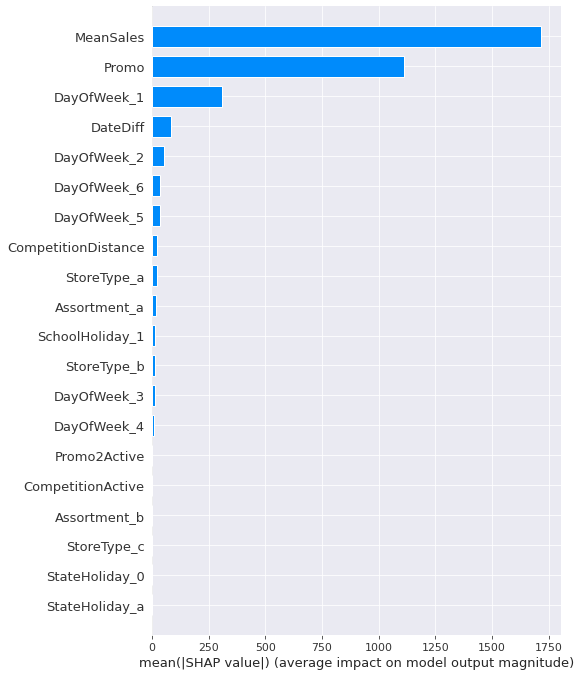

In [ ]:
shap.summary_plot(shap_values, x_train, plot_type="bar")

# **Conclusion**

*   Customers and sales are highly correlated. There is not much fluctuation in average sales per customer.
*   CompetitionDistance has negative impact on sales. Competition stores are present in good locations. Moving away from the location of competitors reduces the sales. 
*   Promo2 has negative impact on sales. It seems that Promo2 is used for stock clearance in which huge 
discounts are given on specific items. This needs further investigation.
*   Lasso and Ridge regressions have similar performance as the Linear regression.
*   Random Forest and Xgboost have better performance than Lasso, Ridge and Linear regression.
*   Among the ensemble models Xgboost performed better with 85% of explained variance.
*   Both Random Forest and Xgboost can be improved further by tuning the hyperparameters.
*   Random Forest require much more RAM as compared to other models. Number of estimators can not be increased more than 100 because of RAM constraint of Google Colaboratory.
*   MeanSales and Promo have the highest impact on sales. MeanSales is the average sales potential of a store. It depends on the location of store and demographics of customers it serves. Further investigation can be done to identify the sales potential of stores more accurately

